# <a id='toc1_'></a>[Investigating Spotify for useful insights](#toc0_)

## <a id='toc1_1_'></a>[Authors](#toc0_)
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**
* **Kasra Hajiheidari**

## <a id='toc1_2_'></a>[Table of Contents](#toc0_)

## <a id='toc1_3_'></a>[Setting Up the Environment](#toc0_)

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

## <a id='toc1_4_'></a>[Loading the Data](#toc0_)

In [4]:
DATA_PATH = '../Phase 0/Dataset/spotify_tracks.csv'

In [5]:
data = pd.read_csv(DATA_PATH)
data.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

## <a id='toc1_5_'></a>[Schema of the Data](#toc0_)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

The spotify dataset contains the following information about the songs:

- **track_id:** The Spotify ID for the track

- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms**: The duration of the song in milliseconds.
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

In [8]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## <a id='toc1_6_'></a>[Preprocessing the Data](#toc0_)

### <a id='toc1_6_1_'></a>[Missing Values](#toc0_)

In [9]:
def calculate_nulls(df):
    null_counts = df.isnull().sum()
    return null_counts

calculate_nulls(data)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

As we can see from the table above, there are 3 missing values. Because of the small number of missing values with respect to the total number of rows in the dataset, we can safely drop these rows.

In [10]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [11]:
data.dropna(inplace=True)
calculate_nulls(data)

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### <a id='toc1_6_2_'></a>[Duplicates](#toc0_)

In [12]:
def calculate_duplicates(df):
    duplicates = df[df.duplicated()]
    return duplicates
def find_duplicates_by_column(df, column_name):
    duplicates = df[df.duplicated(subset=[column_name], keep=False)]
    return duplicates
def filter_data_by_column_value(df, column_name, value):
    filtered_data = df[df[column_name] == value]
    return filtered_data

In [13]:
duplicates = calculate_duplicates(data)
print("Count of duplicate rows:",duplicates.shape[0])

Count of duplicate rows: 450


In [14]:
duplicate_track_ids = find_duplicates_by_column(data, 'track_id')
print("Count of duplicate rows based on track id:",duplicate_track_ids.shape[0])

Count of duplicate rows based on track id: 40900


In [15]:
data_filtered = data.drop_duplicates()

In [16]:
duplicate_rows = filter_data_by_column_value(data_filtered, 'track_id', '2aibwv5hGXSgw7Yru8IYTO')
duplicate_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock
3259,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alternative
37216,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,funk
71158,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,metal
91854,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,rock


### <a id='toc1_6_3_'></a>[Type Conversions](#toc0_)

First of al we convert columns with `object` data type to `string`

In [17]:
def convert_object_to_string(df):
    object_columns = df.select_dtypes(include=['object']).columns
    df[object_columns] = df[object_columns].astype('string')
    return df
data_filtered = convert_object_to_string(data_filtered)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  string 
 1   artists           113549 non-null  string 
 2   album_name        113549 non-null  string 
 3   track_name        113549 non-null  string 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

We should convert `artists` from `String` to `List`

In [18]:
data_filtered['artists'] = data_filtered['artists'].str.split(';')
data_filtered.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### <a id='toc1_6_4_'></a>[Outliers](#toc0_)

Identifying and handling outliers is an important step in the data preprocessing phase. Outliers can have a significant impact on the results of the analysis and can lead to incorrect conclusions. In this section, we will identify and handle outliers in the dataset.
One of potential outliers are extremely short or long tracks.

In [19]:
MINS_TO_MS = 60 * 1000
MIN_DURATION_TO_KEEP = 0.5
MAX_DURATION_TO_KEEP = 15

The songs shorther than `MIN_DURATION_TO_KEEP` are typically not songs and are likely to be skits, ads, or other non-musical content. We will remove these songs from the dataset.

In [20]:
outliers_data = data_filtered[data_filtered['duration_ms'] < MIN_DURATION_TO_KEEP * MINS_TO_MS]
sorted_df = outliers_data.sort_values(by='duration_ms', ascending=True)
print("Count of the songs shorther than 30 seconds:",sorted_df.shape[0])

Count of the songs shorther than 30 seconds: 16


In [21]:
data_filtered = data_filtered[data_filtered['duration_ms'] >= MIN_DURATION_TO_KEEP * MINS_TO_MS]

The songs longer than `MAX_DURATION_TO_KEEP` are typically not songs and are likely to be audiobooks, podcasts, or other long-form content. We will remove these songs from the dataset.

In [22]:
outliers_data = data_filtered[data_filtered['duration_ms'] > MAX_DURATION_TO_KEEP * MINS_TO_MS]
sorted_df = outliers_data.sort_values(by='duration_ms', ascending=False)
print("Count of the songs longer than 15 minutes:",sorted_df.shape[0])

Count of the songs longer than 15 minutes: 151


In [23]:
data_filtered = data_filtered[data_filtered['duration_ms'] <= MAX_DURATION_TO_KEEP * MINS_TO_MS]

### <a id='toc1_6_5_'></a>[Feature Engineering](#toc0_)

We extract `duration_mins` from `duration_ms` column.

In [24]:
data_filtered['duration_mins'] = data_filtered['duration_ms'] / 60000
data_filtered.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


## <a id='toc1_7_'></a>[Features Correlation](#toc0_)

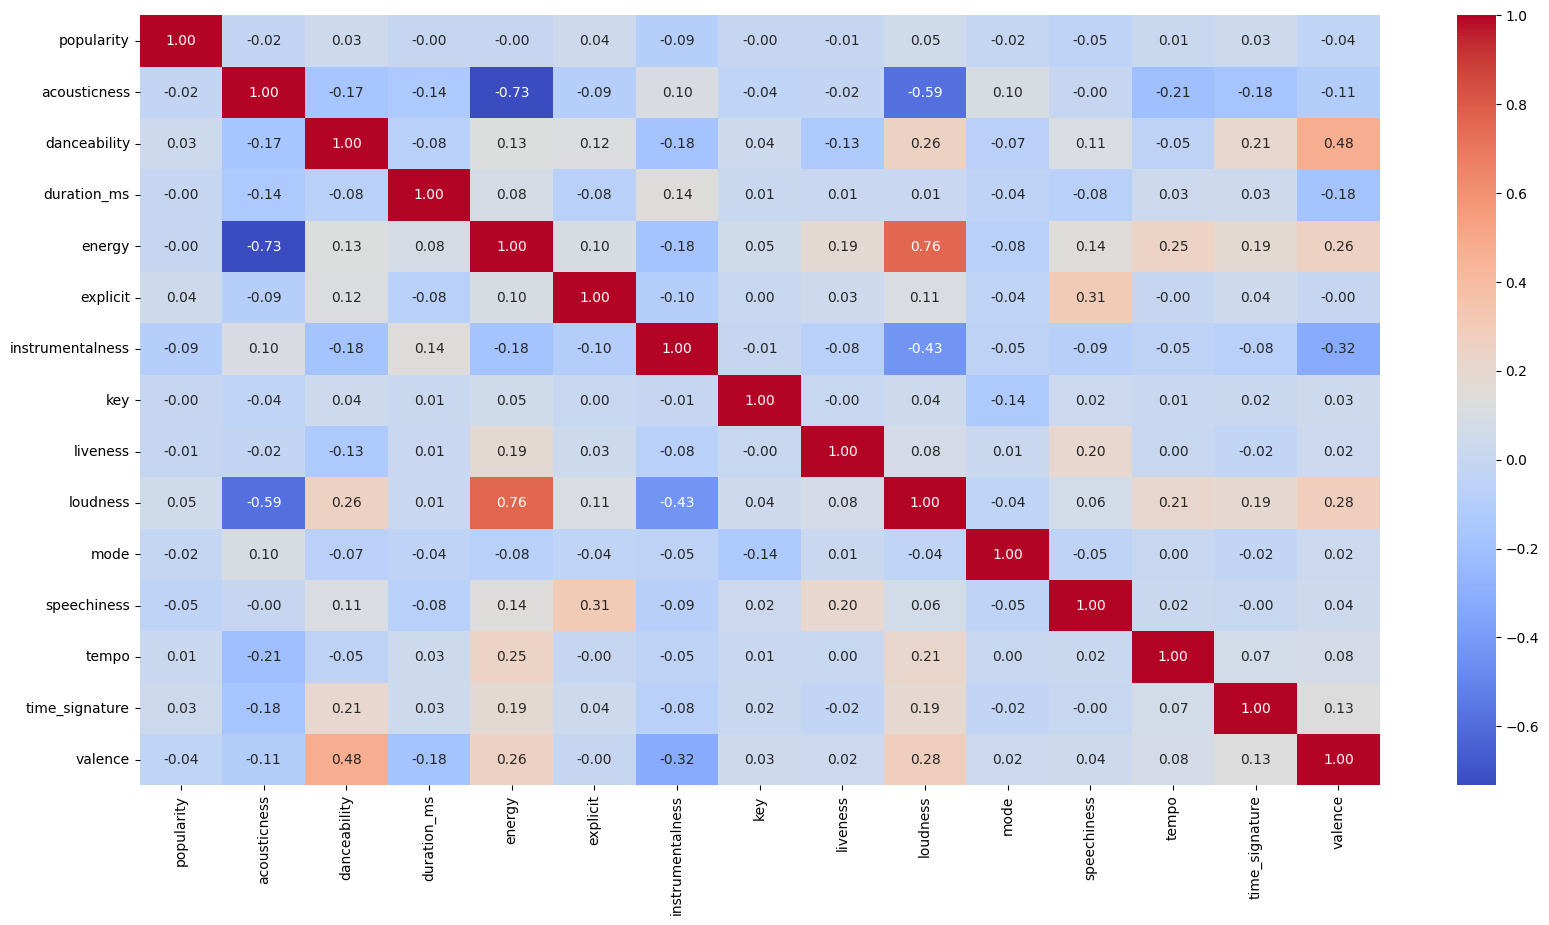

In [25]:
def plot_correlation_matrix(df, columns, figsize=(20, 10)):
    corr_df = df[columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    return corr_df


numeric_columns = ['popularity','acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 
                   'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

corr_df = plot_correlation_matrix(data_filtered, columns=numeric_columns)


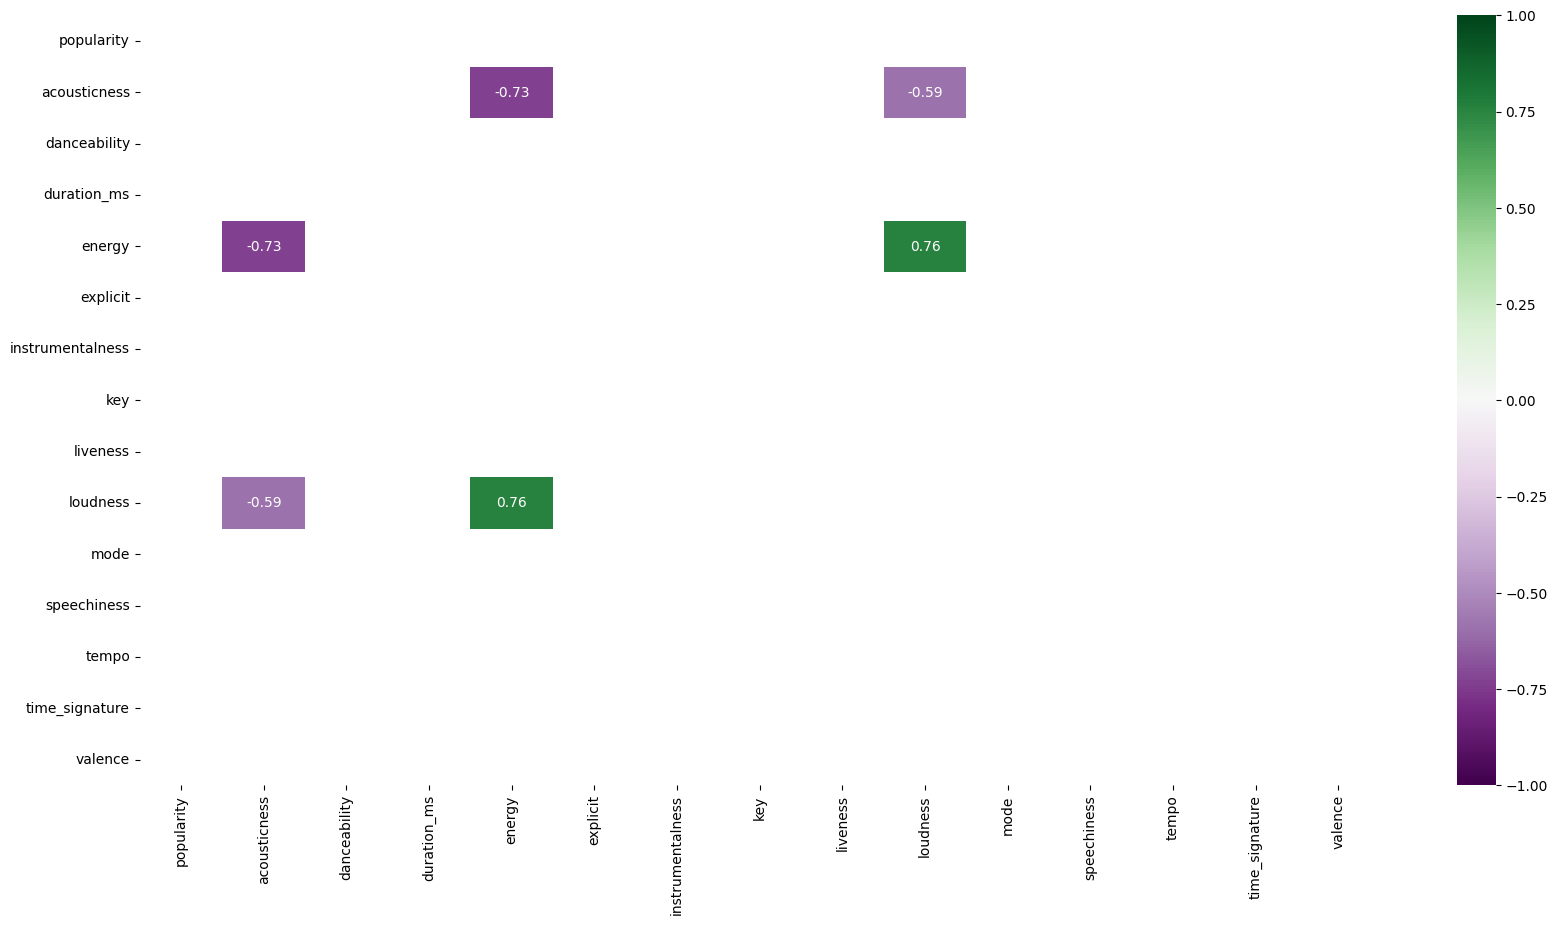

In [26]:
def plot_filtered_correlation_matrix(corr_df, threshold=0.5, figsize=(20, 10)):
    filtered_corr_df = corr_df[(corr_df.abs() > threshold) & (corr_df != 1.0)].copy()
    plt.figure(figsize=figsize)
    sns.heatmap(filtered_corr_df, annot=True, cmap='PRGn', fmt=".2f", vmin=-1, vmax=1, center=0)
    plt.show()

plot_filtered_correlation_matrix(corr_df, threshold=0.5)


As we can see, the `energy` and `loudness` columns have a high positive correlation of `0.76`. This is expected because songs with higher energy levels tend to be louder. 

The `energy` and `acousticness` columns have a high negative correlation of `-0.73`. This is also expected because songs with higher energy levels tend to have lower acousticness levels. 

The `loudness` and `acousticness` columns have a high negative correlation of `-0.59`. This is also expected because songs with higher loudness levels tend to have lower acousticness levels. 

## <a id='toc1_8_'></a>[Features Distribution](#toc0_)

In [27]:
def count_plot(df, col_name, figsize=(12, 6), sorted=True, step=None):
    plt.figure(figsize=figsize)
    if sorted:
        value_counts = df[col_name].value_counts().sort_values(ascending=False)
        sns.countplot(data=df, x=col_name, order=value_counts.index, color='deepskyblue', alpha=0.5)
    else:
        sns.countplot(data=df, x=col_name, color='deepskyblue', alpha=0.5)
    
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'{col_name} Count Plot')
    
    if step is not None:
        plt.xticks(ticks=plt.xticks()[0][::step], rotation=90)
    
    plt.show()

In [28]:
def box_plot(df, x, figsize=(6, 8)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, y=x, color='deepskyblue', showmeans=True, meanline=True,
                meanprops={'linestyle': '--', 'color': 'red'})
    
    plt.title(f'{x} Box Plot')
    plt.show()

In [29]:
def violin_plot(df, x, figsize=(6, 8)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, y=x, color='deepskyblue', inner='quartile', alpha=0.5)
    plt.title(f'{x} Violin Plot')
    plt.show()

In [30]:
def hist_plot(df, col_name, bins=None, figsize=(12, 6), kde=True, normal_estimation=True, rule='sturges', stat='count'):
    target_column = df[col_name]
    
    if bins is None:
        count = target_column.count()
        if rule == 'sturges':
            bins = int(1 + 3.322 * np.log10(count))
        elif rule == 'rice':
            bins = int(2 * count ** (1/3))
        elif rule == 'doane':
            skewness = stats.skew(target_column.dropna())
            bins = int(1 + np.log2(count) + np.log2(1 + abs(skewness)))
        elif rule == 'scott':
            bins = int(3.5 * np.std(target_column.dropna()) / (count ** (1/3)))
        elif rule == 'sqrt':
            bins = int(np.sqrt(count))
        else:
            bins = 10
    plt.figure(figsize=figsize)
    hist_plot = sns.histplot(data=df, x=col_name, bins=bins, color='deepskyblue', kde=kde, alpha=0.5, stat=stat)
    
    if normal_estimation:
        mu, sigma = target_column.mean(), target_column.std()
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        y = stats.norm.pdf(x, mu, sigma)
        scale_factor = hist_plot.get_yticks().max() / y.max()
        y = y * scale_factor
        plt.plot(x, y, color='deeppink', linewidth=2, alpha=0.5)
    
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'{col_name} Histogram Plot')
    
    if normal_estimation:
        plt.legend(['Normal Distribution', 'Kernel Density Estimation'])

    plt.show()

### <a id='toc1_8_1_'></a>[Explicit](#toc0_)

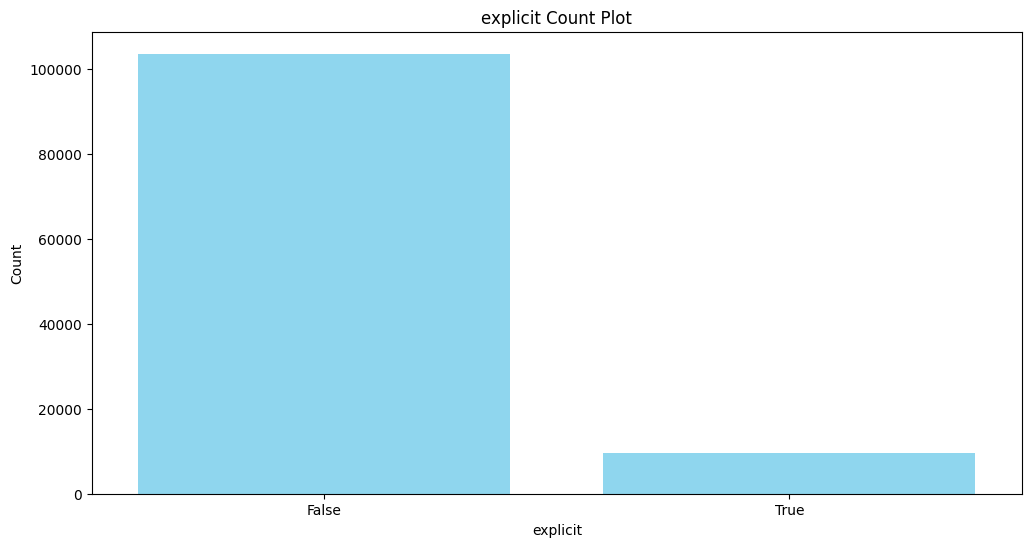

In [31]:
df = data_filtered.copy()
count_plot(df, 'explicit')

### <a id='toc1_8_2_'></a>[Danceability](#toc0_)

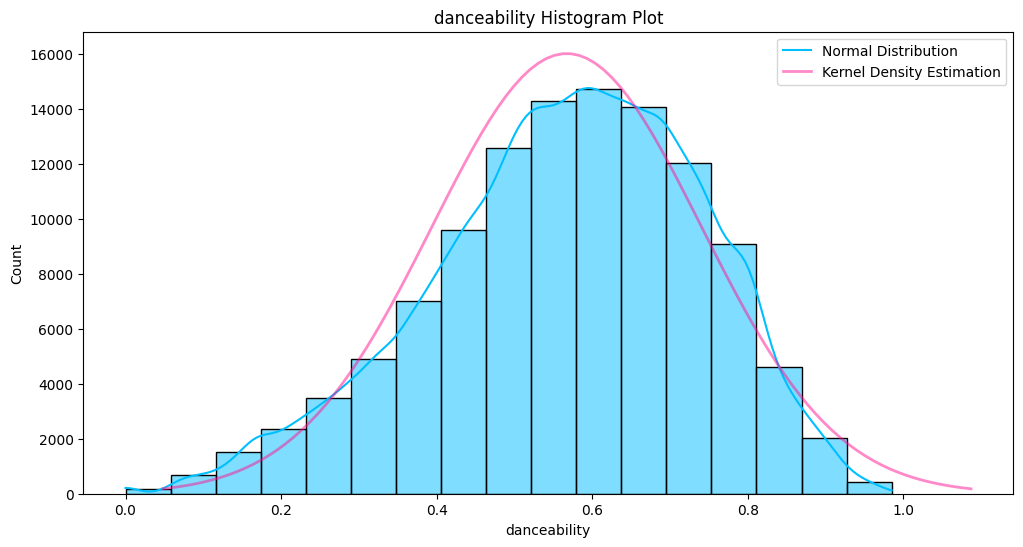

In [32]:
hist_plot(df, 'danceability')

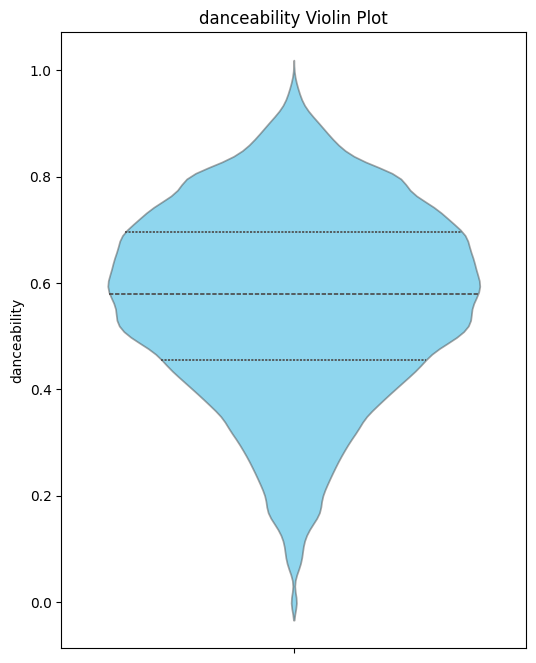

In [33]:
violin_plot(df, 'danceability')

### <a id='toc1_8_3_'></a>[Energy](#toc0_)

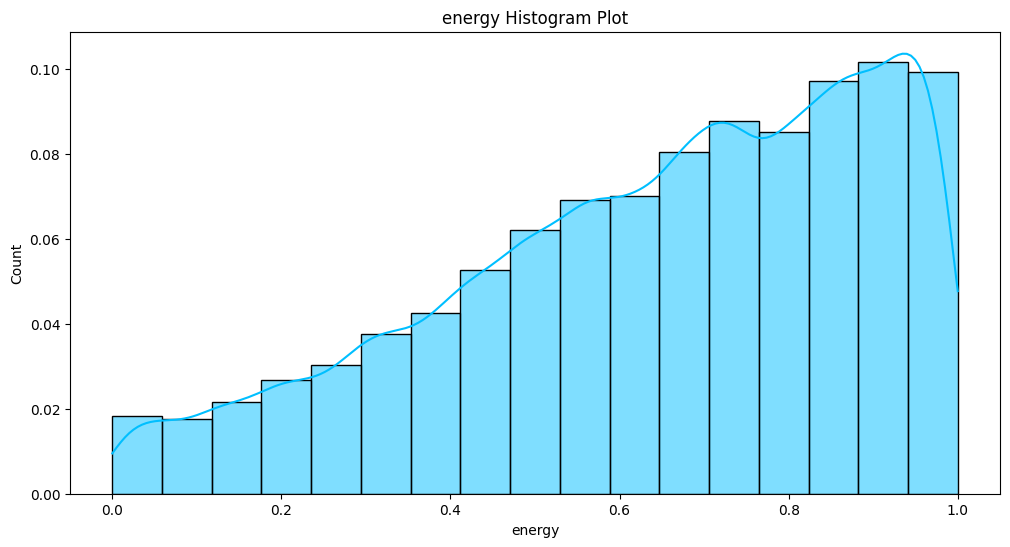

In [34]:
hist_plot(df, 'energy', normal_estimation=False, stat='proportion')

### <a id='toc1_8_4_'></a>[Key](#toc0_)

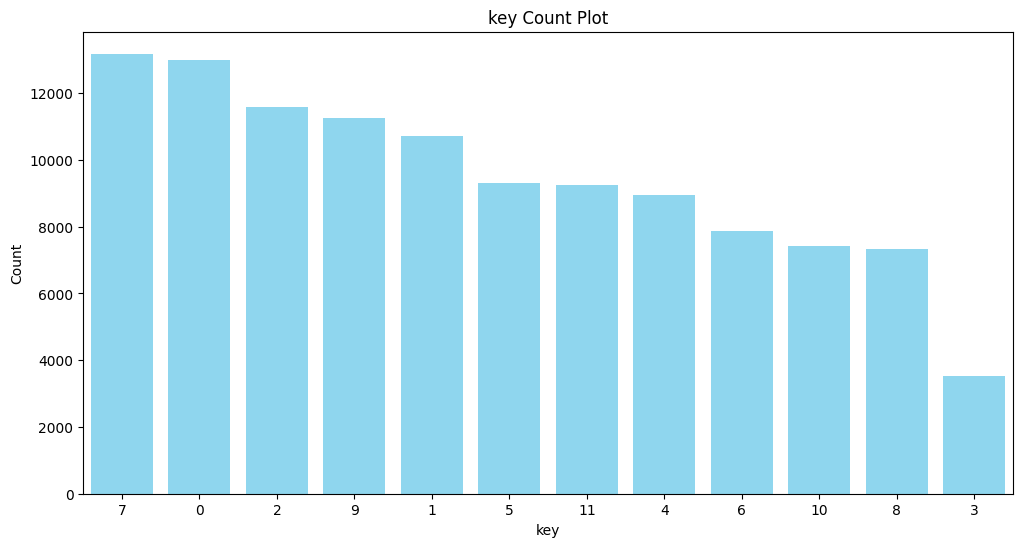

In [35]:
count_plot(df, 'key')

### <a id='toc1_8_5_'></a>[Loudness](#toc0_)

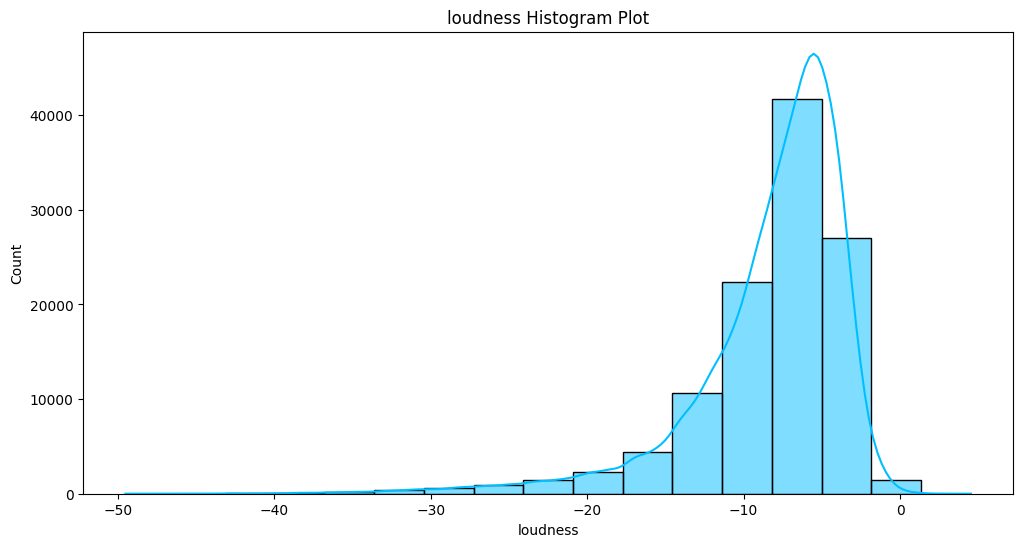

In [36]:
hist_plot(df, 'loudness', normal_estimation=False)

### <a id='toc1_8_6_'></a>[Mode](#toc0_)

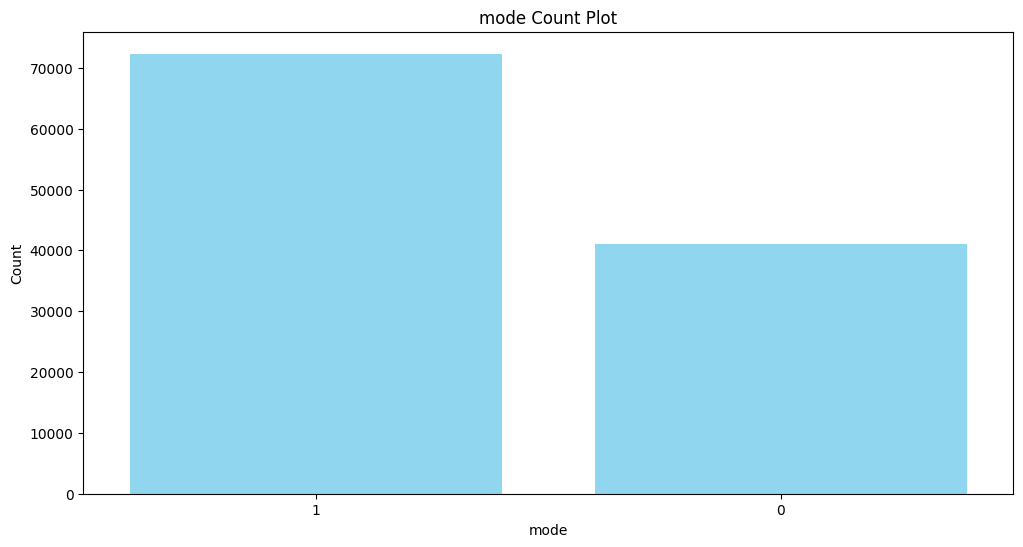

In [37]:
count_plot(df, 'mode')

### <a id='toc1_8_7_'></a>[Speechiness](#toc0_)

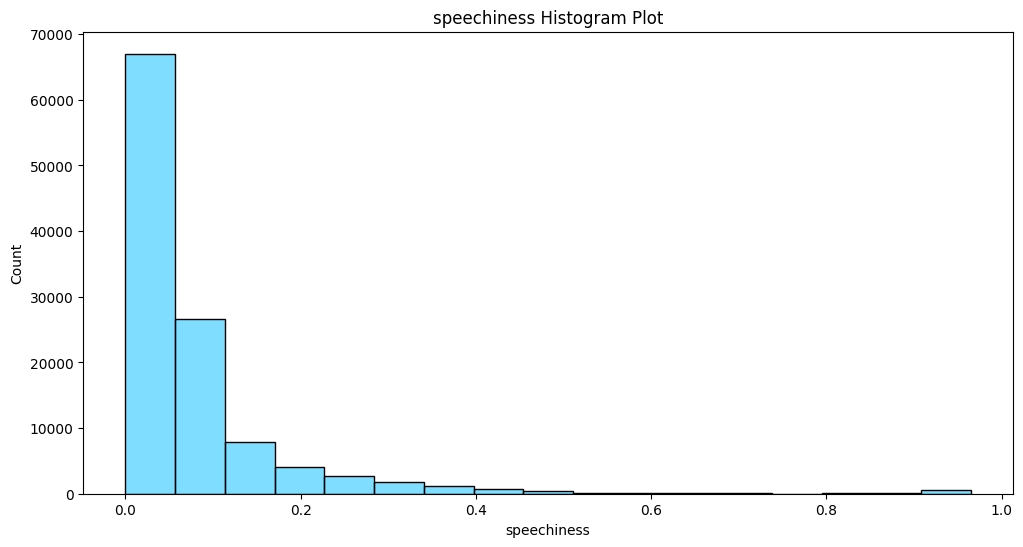

In [38]:
hist_plot(df, 'speechiness', kde=False, normal_estimation=False)

The distribution of speechiness seems to be skewed toward lower values. This is expected because most songs are primarily instrumental and contain little to no spoken words.

### <a id='toc1_8_8_'></a>[Acousticness](#toc0_)

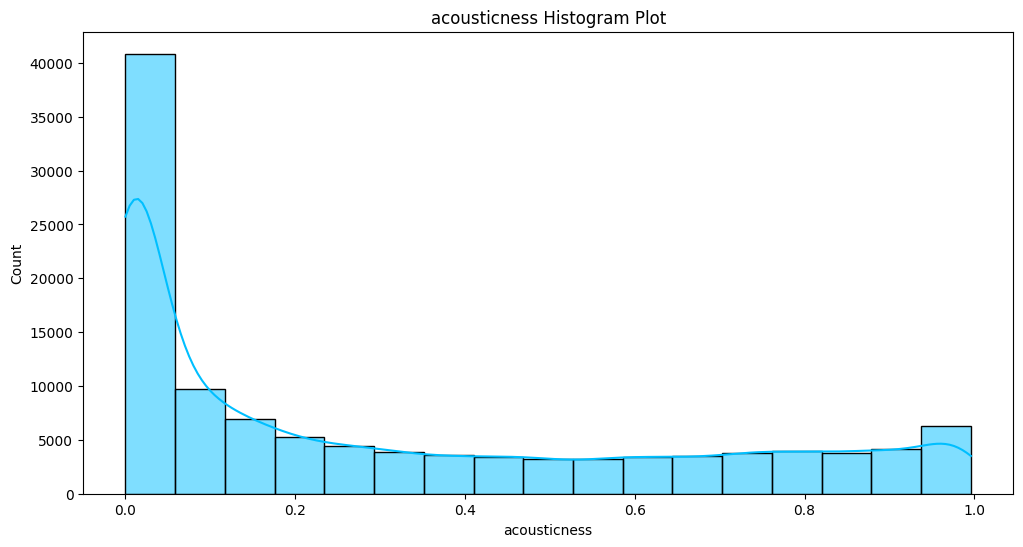

In [39]:
hist_plot(df, 'acousticness', normal_estimation=False)

### <a id='toc1_8_9_'></a>[Instrumentalness](#toc0_)

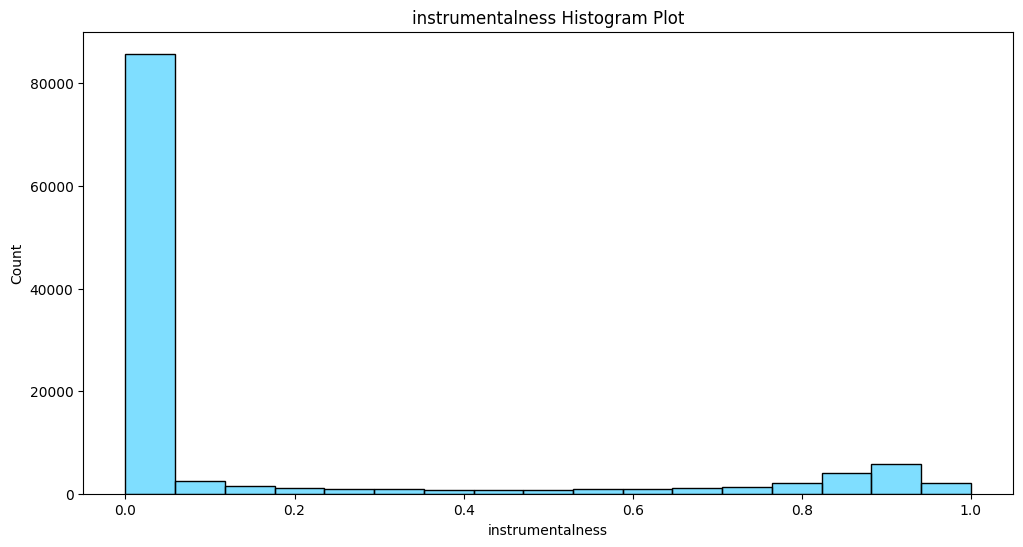

In [40]:
hist_plot(df, 'instrumentalness', kde=False, normal_estimation=False)

### <a id='toc1_8_10_'></a>[Liveness](#toc0_)

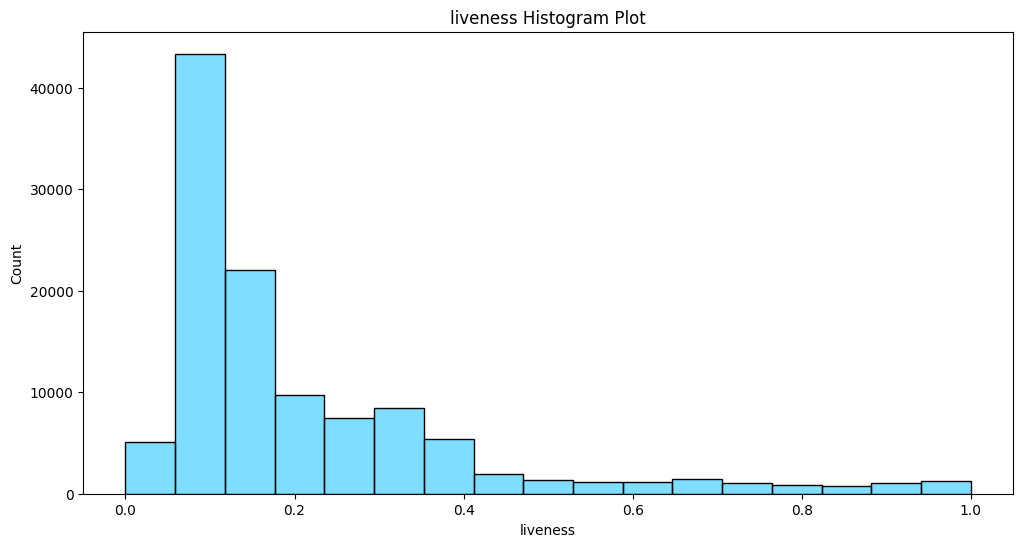

In [41]:
hist_plot(df, 'liveness', kde=False, normal_estimation=False)

### <a id='toc1_8_11_'></a>[Valence](#toc0_)

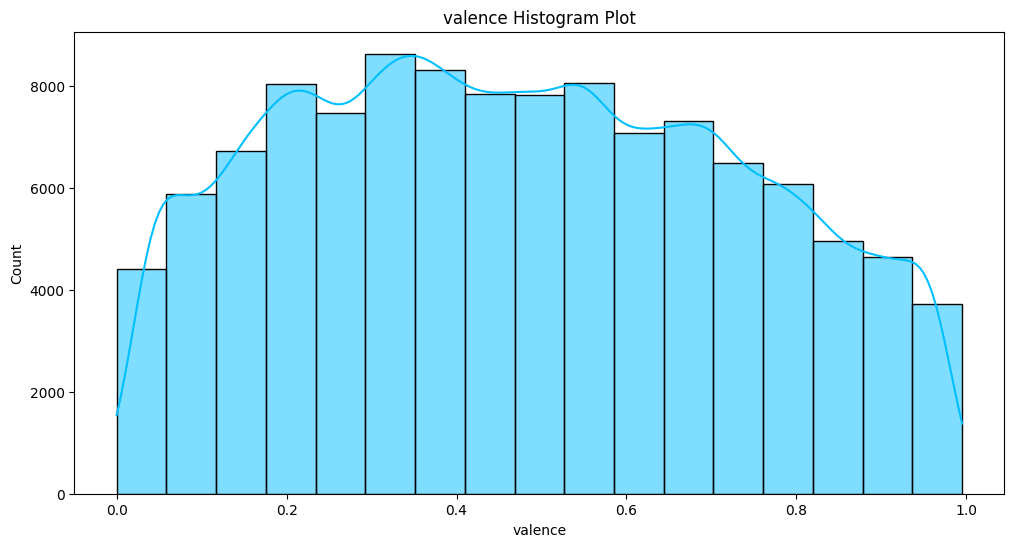

In [42]:
hist_plot(df, 'valence', normal_estimation=False)

### <a id='toc1_8_12_'></a>[Tempo](#toc0_)

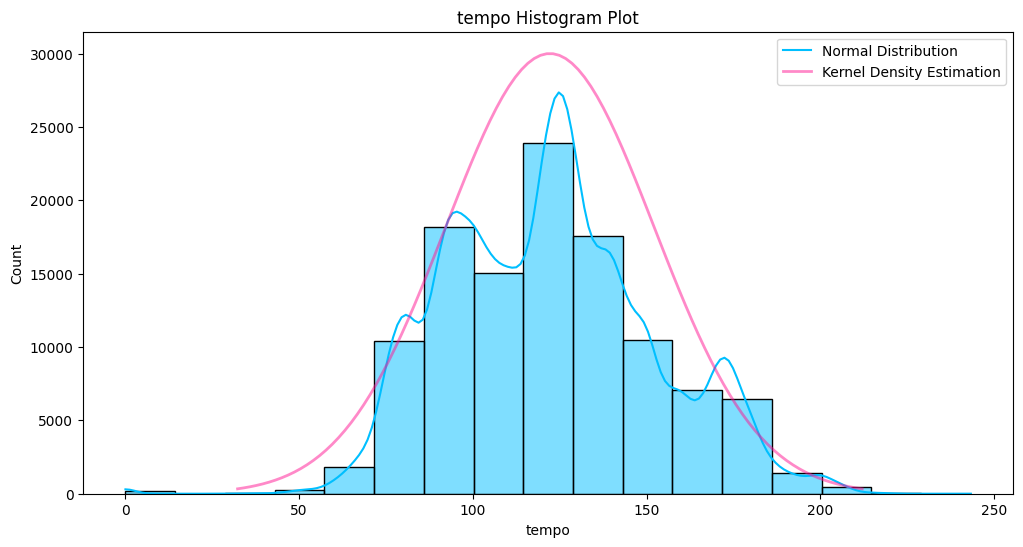

In [43]:
hist_plot(df, 'tempo')

### <a id='toc1_8_13_'></a>[Duration](#toc0_)

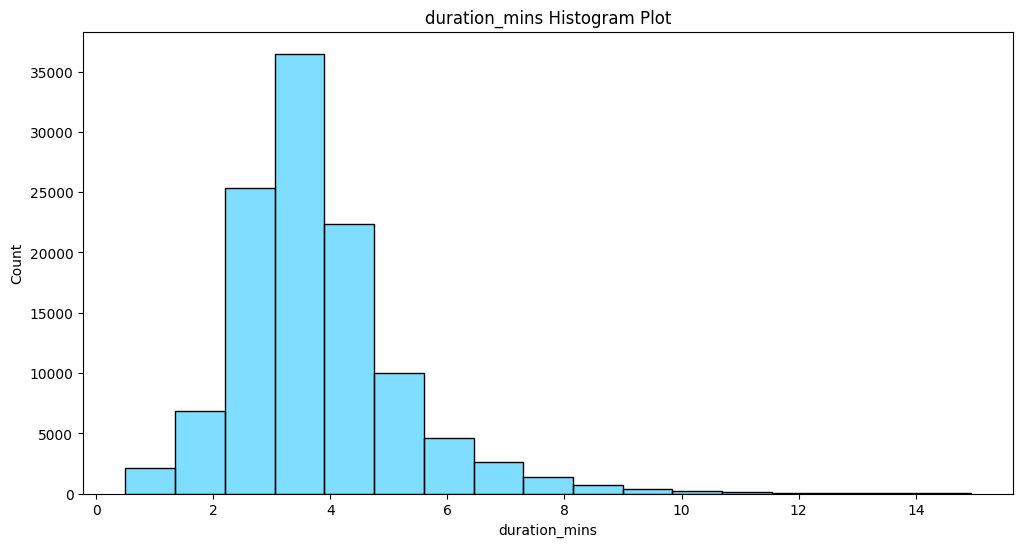

In [44]:
hist_plot(df, 'duration_mins', normal_estimation=False, kde=False)

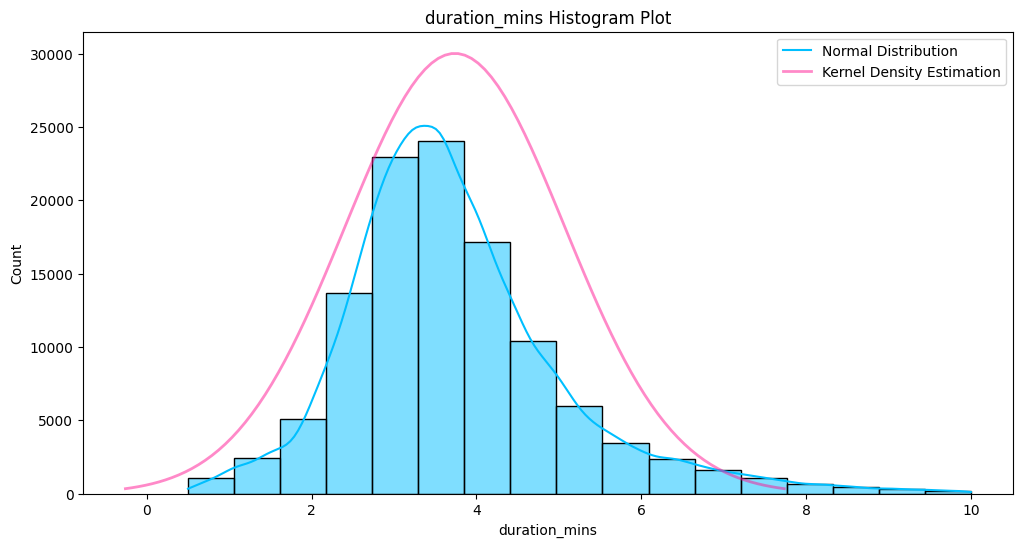

In [45]:
MAX_DURATION_MINS = 10

hist_plot((df[df['duration_mins'] < MAX_DURATION_MINS]), 'duration_mins')

As we can see, most of the songs have a duration between 2 and 5 minutes, which is expected.

### <a id='toc1_8_14_'></a>[Time Signature](#toc0_)

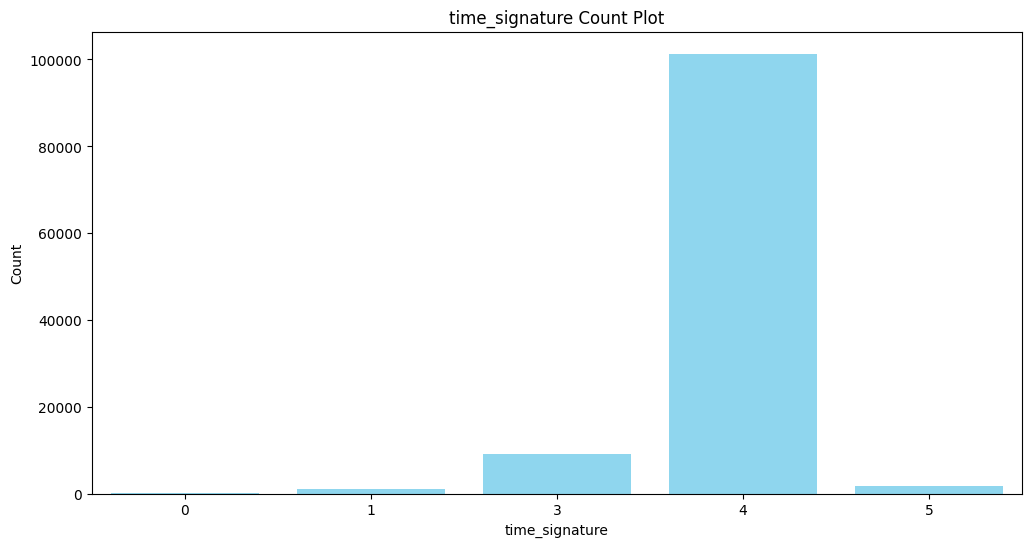

In [46]:
count_plot(df, 'time_signature', sorted=False)

As we can see, most of the songs in this dataset have time signature of 4 which is expected, because most of the songs (specially the western ones) are in 4/4 time signature.

## <a id='toc1_9_'></a>[Top Records](#toc0_)

In [47]:
TOP_RECORDS_COUNT = 5
TOP_RECORDS_COUNT_FOR_PLOTS = 10

### <a id='toc1_9_1_'></a>[The Most Danceable Songs](#toc0_)

In [48]:
sorted_df = df.sort_values('danceability', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
111635,4xKKIS9g9nivSiE7TtgR6V,[Quantic],The Best of Quantic,Sol Clap,19,232853,False,0.985,0.651,9,...,0,0.2170,0.00121,0.17600,0.064,0.405,115.347,4,trip-hop,3.880883
66576,5kgT25LfYrXXMqNG2ia0O6,[That Girl Lay Lay],Tha Cheat Code Reloaded,Medicaid Baby,10,199639,False,0.984,0.650,9,...,1,0.0627,0.67400,0.00516,0.133,0.910,117.995,4,kids,3.327317
24916,1viLe1wmYGwxIj5QOKOB5N,[Delano Smith],An Odyssey,Inspiration,5,469240,False,0.983,0.560,10,...,0,0.1350,0.00432,0.84100,0.101,0.762,124.980,4,detroit-techno,7.820667
73374,0VomrCFhqYNVuhfIRPLeVa,[Oliver Schories],Fields Without Fences,Daily Routines,49,412133,False,0.982,0.478,5,...,0,0.2020,0.11800,0.74000,0.112,0.567,122.007,4,minimal-techno,6.868883
66793,2g1EQO48cbVQy3YEGAe7rS,[Mixx Master Lee],The Mississippi Cha Cha Slide A.K.A. STOMP 2007,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",7,341933,False,0.981,0.675,0,...,1,0.0810,0.02910,0.00000,0.122,0.854,113.995,4,kids,5.698883


### <a id='toc1_9_2_'></a>[The Most Valence Songs](#toc0_)

In [49]:
sorted_df = df.sort_values('valence', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
1813,1QGpYmCjN9Jp4MGXXKnlRt,[Victor Rice],Drink,The Demander,18,138817,False,0.678,0.785,11,...,0,0.0440,0.00941,0.811000,0.170,0.995,141.557,4,afrobeat,2.313617
87943,25PTgpFpSpgKVO5zXekfHT,[Julio Preciado Y Su Banda Perla Del Pacifico],Quisiera Tener Alas,Flor de Capomo,41,129013,False,0.739,0.697,5,...,1,0.0333,0.33000,0.000008,0.111,0.994,125.335,4,r-n-b,2.150217
46041,4eAGVhU2RE0OYfFPXmhixc,[Lawineboys],Remmen Los,Zuipen,30,160000,False,0.849,0.867,0,...,1,0.0350,0.15800,0.000000,0.299,0.993,121.970,4,happy,2.666667
48741,4eAGVhU2RE0OYfFPXmhixc,[Lawineboys],Remmen Los,Zuipen,30,160000,False,0.849,0.867,0,...,1,0.0350,0.15800,0.000000,0.299,0.993,121.970,4,hardcore,2.666667
66064,6D2DCGCJIwF01yYQ9uirb6,[Debbie Doo],Roll Your Hands,Roll Your Hands,32,72718,False,0.741,0.700,0,...,1,0.0391,0.16700,0.000000,0.179,0.993,155.892,4,kids,1.211967


### <a id='toc1_9_3_'></a>[The Least Valence Songs](#toc0_)

In [50]:
sorted_df = df.sort_values('valence', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
101663,55wsymeCqNNMiS6i0isfJk,"[Sleep Baby Sleep, Relax & Relax, Relax Medita...","Fans, Air Units, and Other Office Ambiences (L...",Outside Air Unit 2,34,64102,False,0.0,0.000262,10,...,0,0.0,0.175,0.58500,0.581,0.0,0.0,0,sleep,1.068367
101397,6BB2d2tQcyBfkxOmayHYXM,"[White Noise Babies, White Noise For Baby Sleep]",Loopable White Noise,Clean White Noise - Loopable With No Fade - Wh...,39,67682,False,0.0,0.000020,10,...,1,0.0,0.974,0.00105,0.101,0.0,0.0,0,sleep,1.128033
101797,1U4qWTytgM8NPfJzax6Gqh,"[White Noise Sleep Sounds, Static White Noise ...",White Noise Sleep Sounds,"White Noise - Loopable, No Fade",33,142305,False,0.0,0.000019,0,...,1,0.0,0.000,0.00000,0.000,0.0,0.0,0,sleep,2.371750
101083,3guM77UfyggID9e6epTkBL,[Weißes Rauschen HD],Weißer Lärm Baby Schlaf (Meeresrauschen),Natur eigene Schlafmaschine,48,208105,False,0.0,0.297000,7,...,0,0.0,0.761,0.98000,0.871,0.0,0.0,0,sleep,3.468417
101792,6jMzlM5eXPdjBxB1mya2qs,[Tmsoft’s White Noise Sleep Sounds],Pink Noise Sound,Pink Noise Sound,33,590000,False,0.0,0.000020,2,...,1,0.0,0.155,0.91600,0.444,0.0,0.0,0,sleep,9.833333


### <a id='toc1_9_4_'></a>[The Most Energetic Songs](#toc0_)

In [51]:
sorted_df = df.sort_values('energy', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
101929,47fr4oobqlxGemQFmVjrLm,[Thunder Storm],Rain and Thunder Sleep,Rain and Thunder,32,142473,False,0.165,1.0,1,...,0,0.0524,0.0936,0.984000,0.920,0.00001,81.293,4,sleep,2.374550
78549,3Q5D1WJLp9TtiugDLrslp7,[Jürgen Drews],Musik Box Teil 1,Amigo Charly Brown,29,255360,False,0.586,1.0,9,...,1,0.1350,0.0769,0.000002,0.957,0.39400,135.058,4,party,4.256000
78558,0ksVMStKRQ5mjRT1l8bAC5,"[Mike Der Bademeister, Schwalmrebellen]",Licht am Fahrrad,Licht am Fahrrad,27,192293,False,0.660,1.0,6,...,1,0.0753,0.0363,0.000000,0.780,0.77200,140.006,4,party,3.204883
101555,675IcoMZu7tI2b0dwjSfSb,[Outside Broadcast Recordings],Rain Sound Recouperation,March Rain,36,206165,False,0.248,1.0,1,...,1,0.0474,0.1360,0.991000,0.514,0.00809,92.146,4,sleep,3.436083
101529,0e5U7A2b0TMft348MxyT2p,"[Ocean Sounds, BodyHI, Ocean Waves For Sleep]",Baby Sleep: Ocean Sounds,Calming Sea Waves,36,132374,False,0.180,1.0,1,...,0,0.0739,0.4050,0.777000,0.931,0.00001,85.082,1,sleep,2.206233


### <a id='toc1_9_5_'></a>[The Loudest Songs](#toc0_)

In [52]:
sorted_df = df.sort_values('loudness', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
17574,0HfHtjS9S9q4DGVC3uIIRB,[Five Star Hotel],Gray Data,Fate Dance,16,237000,False,0.310,0.999,4,...,0,0.3430,0.000102,0.945000,0.148,0.0333,160.040,4,club,3.950000
59225,5rm5Zqktf6v3u9yGj6RR5W,[Najand],In the Night of Revolution,Islamic Capitalism,0,60056,False,0.149,0.868,3,...,0,0.0767,0.191000,0.865000,0.625,0.0494,136.188,3,iranian,1.000933
38840,7K0pkS5lqUkFd9kuY0spiK,[The Red Pears],We Bring Anything to the Table... Except Table...,Time Bomb,25,176065,False,0.442,0.800,4,...,1,0.0686,0.262000,0.000001,0.664,0.3690,118.053,4,garage,2.934417
59337,1VHxmBxtPxLmI5Ffb8W35O,[Najand],In the Night of Revolution,A Better World Is Possible,0,60056,False,0.244,0.499,2,...,1,0.0794,0.241000,0.718000,0.801,0.0347,99.663,3,iranian,1.000933
37738,0t35f7eKjuLqXfidSEvDL2,[DJ BRUNO PRADO],TIPO HARIEL - SEI QUE E RARIDADE -,TIPO HARIEL - SEI QUE E RARIDADE -,44,203076,True,0.951,0.987,0,...,0,0.3630,0.611000,0.000033,0.103,0.6740,130.005,4,funk,3.384600


### <a id='toc1_9_6_'></a>[The Quietest Songs](#toc0_)

In [53]:
sorted_df = df.sort_values('loudness', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
101888,5utUKeJ2ZG9KCZbvdEzPfa,[White Noise Sleep Sounds],Soothing White Noise,Soothing White Noise - Loopable With No Fade,32,65248,False,0.000,0.000687,10,...,0,0.0000,0.908,0.943,0.1010,0.0000,0.000,0,sleep,1.087467
101538,0jZmx4t0Fg4SJxJj0jnAdU,[White Noise Sleep Sounds],Soothing White Noise,White Noise - Loopable With No Fade,37,74217,False,0.000,0.003320,10,...,0,0.0000,0.910,0.849,0.1010,0.0000,0.000,0,sleep,1.236950
101722,5B9ZSS4Xd7d0WTdRjG0fJh,[Atmosphere Asmr],Fan Sounds & White Noise 2 (Deluxe Edition),Ceiling Fan Sound on Low Power,34,120000,False,0.162,0.004830,6,...,0,0.0507,0.924,0.965,0.1100,0.0327,138.768,4,sleep,2.000000
101360,6UT7KpL0wkYVBNSydJFCSi,"[White Noise for Babies, Crickets, Baby Sleep ...",Cricket Sounds,Cricket Sound 4 - Loopable With No Fade,54,71000,False,0.461,0.003250,10,...,0,0.0639,0.915,0.862,0.0594,0.0728,111.653,4,sleep,1.183333
79719,4NSH5KlrNzdH9OBtgsBFpL,[Lazar Berman],Inedito (Unpublished),Chaconne in sol maggiore : Variazione 9,58,63840,False,0.387,0.001810,7,...,0,0.0632,0.995,0.919,0.0996,0.4750,98.691,4,piano,1.064000


### <a id='toc1_9_7_'></a>[The Longest Songs](#toc0_)

In [54]:
sorted_df = df.sort_values('duration_ms', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
9563,4WCywozuuSXGl3CscRHVD5,"[Dunamis Music, Rapha Gonçalves, MORADA]",The Send Brasil (Ao Vivo),Só Tu és Santo / Pra Onde Eu Irei? / É Tudo So...,45,896445,False,0.246,0.840,0,...,1,0.0591,0.12700,0.000,0.222,0.1400,136.730,4,brazil,14.940750
40205,4WCywozuuSXGl3CscRHVD5,"[Dunamis Music, Rapha Gonçalves, MORADA]",The Send Brasil (Ao Vivo),Só Tu és Santo / Pra Onde Eu Irei? / É Tudo So...,45,896445,False,0.246,0.840,0,...,1,0.0591,0.12700,0.000,0.222,0.1400,136.730,4,gospel,14.940750
6056,1wJ5Z1Nkcqknyi2U2mjL0G,[Agalloch],The Mantle,In The Shadow Of Our Pale Companion (2016 - Re...,11,892319,False,0.247,0.846,11,...,0,0.0531,0.00122,0.586,0.125,0.0698,115.064,4,black-metal,14.871983
9766,7frJTPBH4qaatdpJXJfjB5,[Antonio Cirilo],Poderoso Deus,Poderoso Deus,44,889066,False,0.447,0.320,2,...,1,0.0306,0.81300,0.000,0.176,0.1480,124.428,4,brazil,14.817767
40265,7frJTPBH4qaatdpJXJfjB5,[Antonio Cirilo],Poderoso Deus,Poderoso Deus,44,889066,False,0.447,0.320,2,...,1,0.0306,0.81300,0.000,0.176,0.1480,124.428,4,gospel,14.817767


### <a id='toc1_9_8_'></a>[The Shortest Songs](#toc0_)

In [55]:
sorted_df = df.sort_values('duration_ms', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)  

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
26672,04VFfRka9MBc5qlRcDuV8T,"[Alan Menken, Disney]",A Pequena Sereia (Trilha Sonora Original em Po...,Fanfarra,22,30080,False,0.5990,0.280,2,...,1,0.0843,0.796,0.00751,0.0634,0.56400,119.539,4,disney,0.501333
98764,04VFfRka9MBc5qlRcDuV8T,"[Alan Menken, Disney]",A Pequena Sereia (Trilha Sonora Original em Po...,Fanfarra,21,30080,False,0.5990,0.280,2,...,1,0.0843,0.796,0.00751,0.0634,0.56400,119.539,4,show-tunes,0.501333
66653,47Y7lrGmsWbx8uEtQWsvjM,[Dora The Explorer],Dora The Explorer,ABC (The Alphabet Song),27,30186,False,0.7940,0.160,2,...,1,0.0521,0.839,0.00000,0.1760,0.80200,107.881,4,kids,0.503100
14513,5C3X6QpPGGuFIlvwM8Eh0B,[WowKidz],50 Top Hindi Nursery Rhymes,Akkad Bakkad,22,30209,False,0.9610,0.456,11,...,1,0.0416,0.326,0.00000,0.2060,0.96800,104.965,4,children,0.503483
101907,7nHXb0ce9MuoZg3uUGTGqA,"[Nature Sounds, Rain Sounds Lab, Rain]",Night Rain,Rain Roof,32,30222,False,0.0729,0.968,6,...,1,0.0443,0.127,0.98500,0.8930,0.00154,177.409,3,sleep,0.503700


### <a id='toc1_9_9_'></a>[Songs with the Highest Tempo](#toc0_)

In [56]:
sorted_df = df.sort_values('tempo', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
8619,55ROr3cl3yi4YRBgfpDy1d,[J.J. Cale],Naturally,Call The Doctor,59,147200,False,0.466,0.188,1,...,0,0.0547,0.198,0.657000,0.0820,0.6150,243.372,3,blues,2.453333
111908,25G1w3E4OMrovtPE5F510g,[Portishead],Portishead,Undenied,46,260026,False,0.241,0.281,0,...,1,0.0416,0.450,0.000007,0.0937,0.0321,222.605,3,trip-hop,4.333767
26681,3Qq52P28qQHcFXZeoQmNSm,[Billboard Baby Lullabies],Lullaby Renditions of Winnie the Pooh,Hip Hip Pooh Rah,20,88641,False,0.244,0.323,0,...,1,0.0464,0.968,0.947000,0.1430,0.3590,220.525,4,disney,1.477350
26638,1FUCKL0Q7UZBz3J1eUjSbJ,[Billboard Baby Lullabies],Lullaby Renditions of Winnie the Pooh,Heffalumps and Woozles,20,108777,False,0.225,0.257,0,...,0,0.0443,0.992,0.901000,0.1650,0.2950,220.084,4,disney,1.812950
1144,2mvXJ9JNoxuX50uT2mLHhN,[Hugh Masekela],Best Afrobeat Tunes,Makoti,0,274933,False,0.469,0.824,8,...,1,0.0944,0.478,0.268000,0.0760,0.7810,220.081,4,afrobeat,4.582217


### <a id='toc1_9_10_'></a>[Songs with the Lowest Tempo](#toc0_)

In [57]:
sorted_df = df.sort_values('tempo', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
101577,3gIEb1mxGFTMlJAkaYaG2Q,"[Sleep Baby Sleep, Relaxation, White Noise Med...","Brown Noise, White Noise, and Binaural Beats E...",Pure White Noise - Loopable with No Fade,35,73886,False,0.0,0.000000,0,...,0,0.0,0.000,0.000,0.000,0.0,0.0,0,sleep,1.231433
101698,6eu7S3v7Py2gw3eukxiHbD,[Weißes Rauschen HD],"Weißes Geräusch Für Tiefen Schlaf, Tinnitus Un...",Weißes Rauschen: Hintergrund Lärm Für Schlaf,34,104292,False,0.0,0.000174,1,...,1,0.0,0.921,0.748,0.211,0.0,0.0,0,sleep,1.738200
101729,0XsJEXpDjyrTR08Su32Vpy,[Water Sound Natural White Noise],White Noise Spa – Calming Noises,Healing Noises for Insomniac,34,62000,False,0.0,0.005200,8,...,1,0.0,0.108,0.555,0.589,0.0,0.0,0,sleep,1.033333
101733,2bhLx29FJZ6aDUxPsKzpz3,"[Sleep Baby Sleep, Rain Sounds, Calm Children ...","Rain Drop Medley of Roof, Thunder, Forest, Car...",Pouring Rain and Soothing Brown Noise,33,93451,False,0.0,0.000043,2,...,1,0.0,0.194,0.999,0.718,0.0,0.0,0,sleep,1.557517
101743,68bHNMOv11rVzVs6QJFvIv,"[Rain Sounds, Sounds Of Nature : Thunderstorm,...","20 Sleeping Rain Sounds - Cure Insomnia, Sleep...",Continuous Rain,34,162495,False,0.0,0.998000,11,...,0,0.0,0.132,0.942,0.891,0.0,0.0,0,sleep,2.708250


In [58]:
def show_barplot(df, x, y, figsize=(12, 6), xlabel=None, ylabel=None, title=None, step=None):
	if xlabel is None:
		xlabel = x
	if ylabel is None:
		ylabel = y
	if title is None:
		title = f'{y} by {x} Bar Plot'

	plt.figure(figsize=figsize)
	sns.barplot(data=df, x=x, y=y, color='deepskyblue', alpha=0.5)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	if step is not None:
		plt.xticks = plt.xticks()[0][::step]
	plt.show()

### <a id='toc1_9_12_'></a>[Artists with the Most Songs](#toc0_)

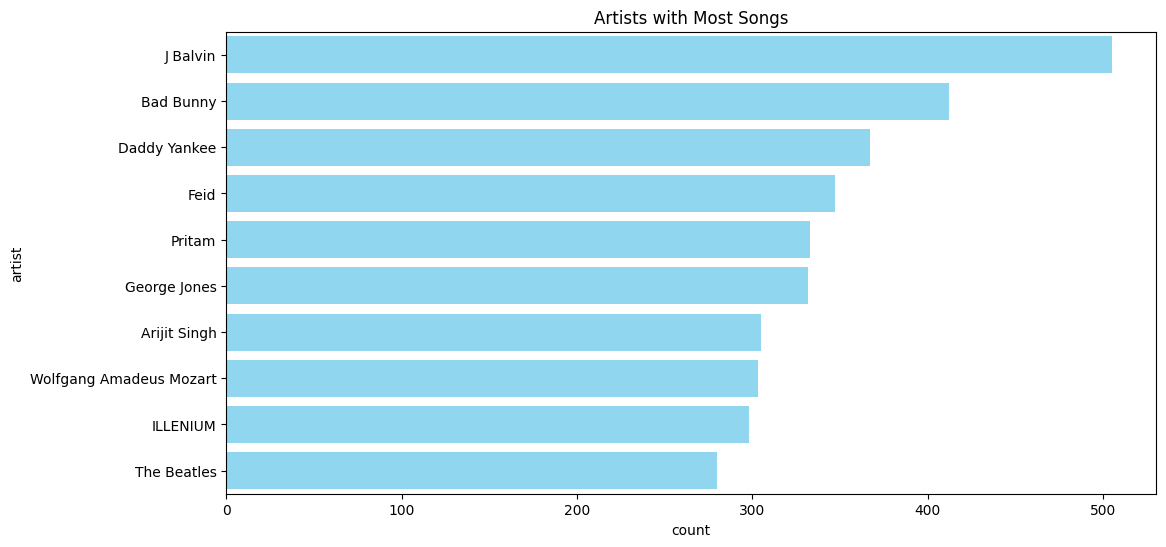

In [59]:
artists_song_count = df.explode('artists')['artists'].value_counts().reset_index()
artists_song_count.columns = ['artist', 'count']
artists_with_most_songs = artists_song_count.head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(artists_with_most_songs, 'count', 'artist', title='Artists with Most Songs')

### <a id='toc1_9_13_'></a>[Artists with the Most Albums](#toc0_)

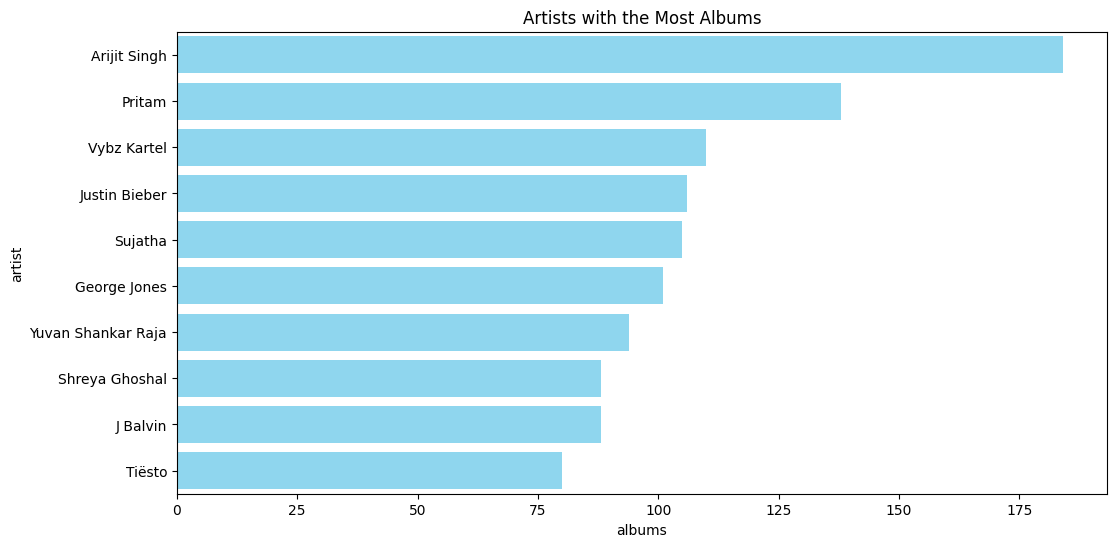

In [60]:
artist_album_count = df.explode('artists').groupby('artists')['album_name'].nunique().reset_index()
artist_album_count.columns = ['artist', 'albums']
artists_with_most_albums = artist_album_count.sort_values(by='albums', ascending=False).head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(artists_with_most_albums, 'albums', 'artist', title='Artists with the Most Albums')

### <a id='toc1_9_14_'></a>[Albums with the Most Songs](#toc0_)

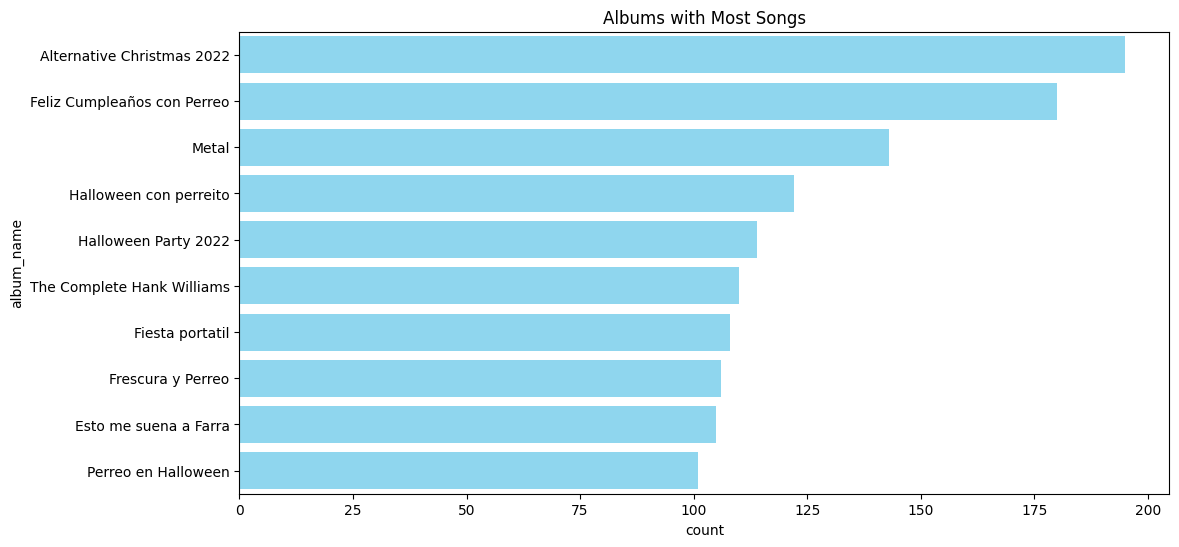

In [61]:
albums_with_most_songs = df.groupby('album_name').size().reset_index(name='count')
albums_with_most_songs = albums_with_most_songs.sort_values(by='count', ascending=False).head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(albums_with_most_songs, 'count', 'album_name', title='Albums with Most Songs')

### <a id='toc1_9_16_'></a>[Artists with the Most Explicit Songs](#toc0_)

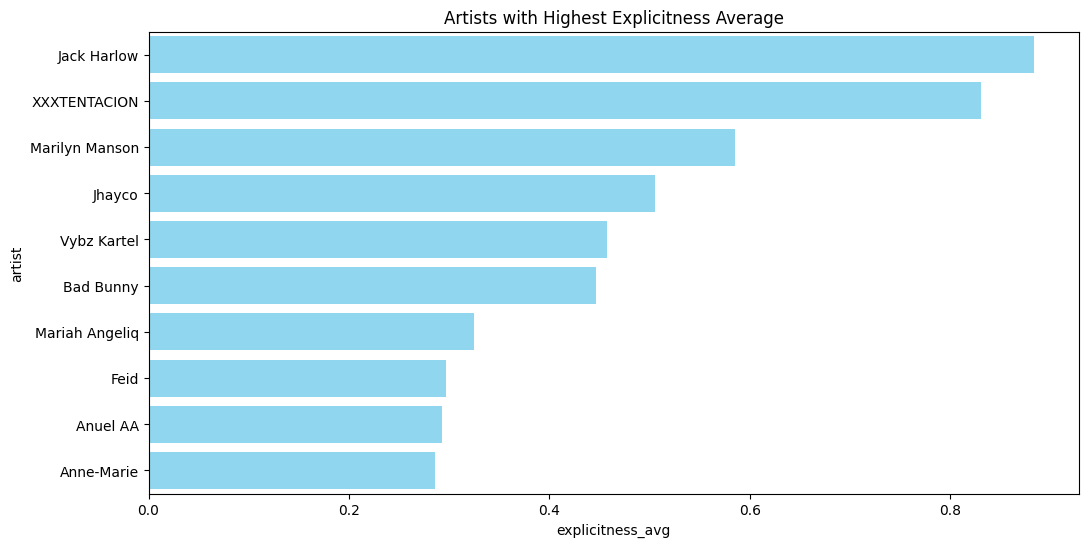

In [73]:
MIN_SONGS_COUNT = 100

df_exploded = df.explode('artists')
df_exploded['explicit'] = df_exploded['explicit'].map({True: 1, False: 0})
artists_explicitness_avg = df_exploded.groupby('artists')['explicit'].mean().reset_index()
artists_explicitness_avg.columns = ['artist', 'explicitness_avg']
artists_song_count = df_exploded['artists'].value_counts().reset_index()
artists_song_count.columns = ['artist', 'count']
filtered_artists = artists_song_count[artists_song_count['count'] >= MIN_SONGS_COUNT]
most_explicit_artists = pd.merge(artists_explicitness_avg, filtered_artists, on='artist')
most_explicit_artists = most_explicit_artists.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'explicitness_avg')
show_barplot(most_explicit_artists, 'explicitness_avg', 'artist', title='Artists with Highest Explicitness Average')

### <a id='toc1_9_17_'></a>[Artists with the Most Danceable Songs](#toc0_)

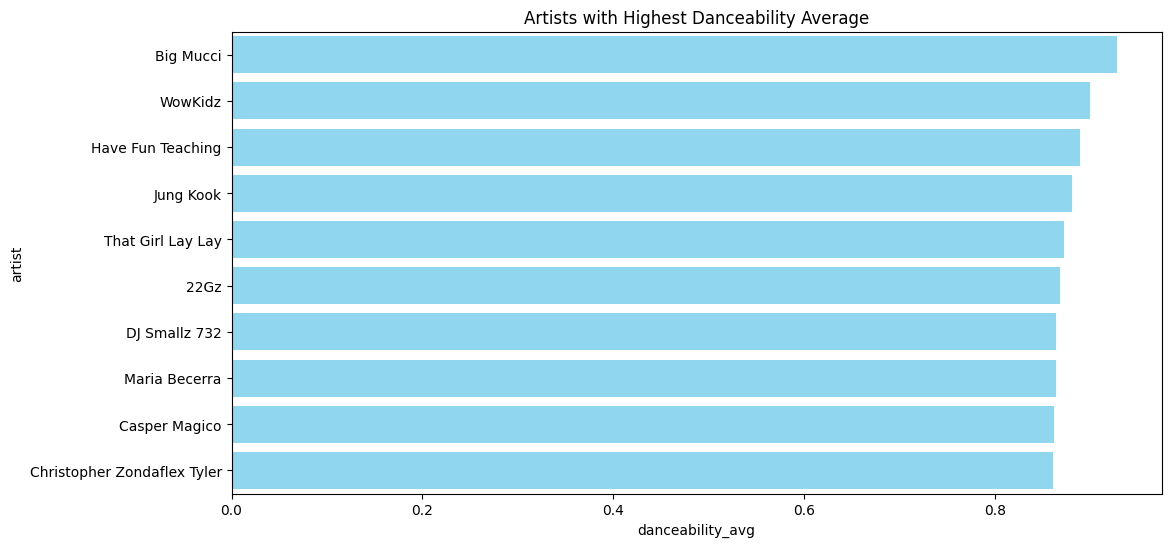

In [78]:
df_exploded = df.explode('artists')
artists_danceability_avg = df_exploded.groupby('artists')['danceability'].mean().reset_index()
artists_danceability_avg.columns = ['artist', 'danceability_avg']
filtered_artists = df_exploded['artists'].value_counts().reset_index()
filtered_artists.columns = ['artist', 'count']
filtered_artists = filtered_artists[filtered_artists['count'] >= MIN_SONGS_COUNT]
artists_danceability_avg = pd.merge(artists_danceability_avg, filtered_artists, on='artist')
most_danceable_artists = artists_danceability_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'danceability_avg')
show_barplot(most_danceable_artists, 'danceability_avg', 'artist', title='Artists with Highest Danceability Average')

### <a id='toc1_9_18_'></a>[Artists with the Loudest Songs](#toc0_)

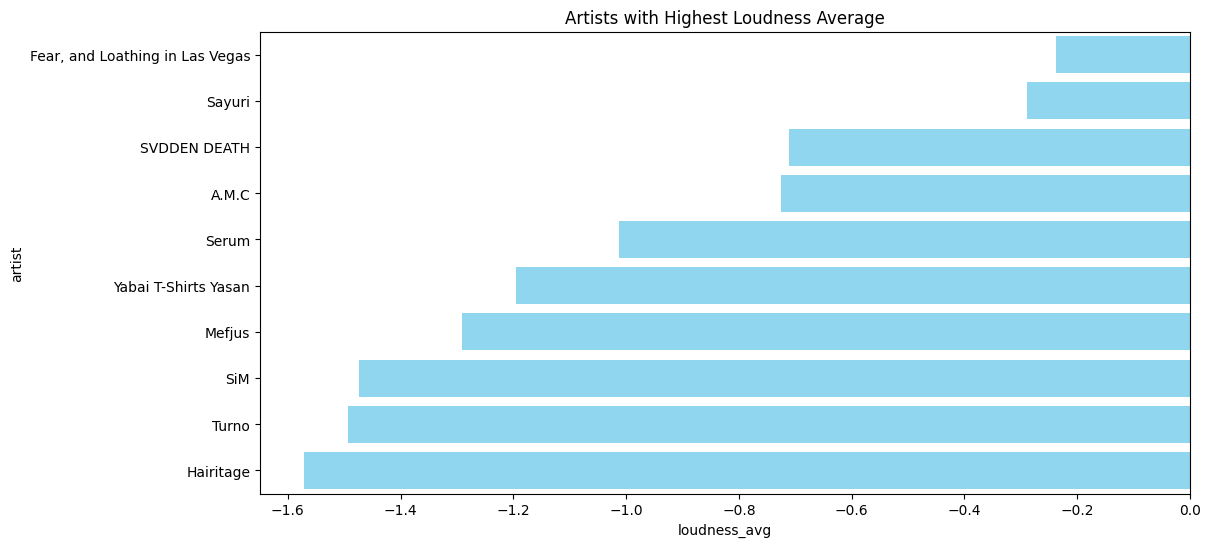

In [77]:
df_exploded = df.explode('artists')
artists_loudness_avg = df_exploded.groupby('artists')['loudness'].mean().reset_index()
artists_loudness_avg.columns = ['artist', 'loudness_avg']
filtered_artists = df_exploded['artists'].value_counts().reset_index()
filtered_artists.columns = ['artist', 'count']
filtered_artists = filtered_artists[filtered_artists['count'] >= MIN_SONGS_COUNT]
artists_loudness_avg = pd.merge(artists_loudness_avg, filtered_artists, on='artist')
most_loud_artists = artists_loudness_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'loudness_avg')
show_barplot(most_loud_artists, 'loudness_avg', 'artist', title='Artists with Highest Loudness Average')